In [2]:
import csv
import numpy as np
import pandas as pd
from math import factorial

import datetime
from datetime import date
import datetime
import time

import scipy
import os, os.path
from os import listdir
from os.path import isfile, join

import re
# from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb

import sys


# search path for modules
# look @ https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/NASA/Python_codes/')
import NASA_core as nc
import NASA_plot_core as npc

### Set up directories

In [4]:
data_dir = "/Users/hn/Documents/01_research_data/NASA/VI_TS/05_fifth_investigation/"
param_dir = "/Users/hn/Documents/00_GitHub/Ag/NASA/parameters/"

In [30]:
irrigatedAnnuals = pd.read_csv(param_dir + "irrigatedAnnuals.csv")

In [6]:
file_names = [x for x in os.listdir(data_dir) if x.endswith(".csv")]
file_names = [x for x in file_names if "variance" in x]
np.sort(file_names).tolist()

['Eastern_WA_2017_07_variance_WrongYear.csv',
 'Eastern_WA_2017_07_variance_correctYear.csv',
 'Eastern_WA_2017_08_variance_WrongYear.csv',
 'Eastern_WA_2017_08_variance_correctYear.csv',
 'Eastern_WA_2018_07_variance_WrongYear.csv',
 'Eastern_WA_2018_07_variance_correctYear.csv',
 'Eastern_WA_2018_08_variance_WrongYear.csv',
 'Eastern_WA_2018_08_variance_correctYear.csv']

In [7]:
file_names_correct = [x for x in file_names if "correctYear" in x]
file_names_wrong = [x for x in file_names if "WrongYear" in x]

In [8]:
np.sort(file_names_correct).tolist()

['Eastern_WA_2017_07_variance_correctYear.csv',
 'Eastern_WA_2017_08_variance_correctYear.csv',
 'Eastern_WA_2018_07_variance_correctYear.csv',
 'Eastern_WA_2018_08_variance_correctYear.csv']

In [9]:
July_2017 = pd.read_csv(data_dir + "Eastern_WA_2017_07_variance_correctYear.csv")
Aug_2017  = pd.read_csv(data_dir + "Eastern_WA_2017_08_variance_correctYear.csv")
July_2018 = pd.read_csv(data_dir + "Eastern_WA_2018_07_variance_correctYear.csv")
Aug_2018  = pd.read_csv(data_dir + "Eastern_WA_2018_08_variance_correctYear.csv")

In [10]:
July_2017.shape

(72140, 8)

In [11]:
July_2017 = July_2017[July_2017['NDVI_max'].notna()]
Aug_2017  = Aug_2017[Aug_2017['NDVI_max'].notna()]
July_2018 = July_2018[July_2018['NDVI_max'].notna()]
Aug_2018  = Aug_2018[Aug_2018['NDVI_max'].notna()]

In [12]:
July_2017.shape

(72128, 8)

### Set the plotting style

In [13]:
size = 20
title_FontSize = 10
legend_FontSize = 8
tick_FontSize = 12
label_FontSize = 14

params = {'legend.fontsize': 'medium',
          'figure.figsize': (6, 4),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size * 0.75,
          'ytick.labelsize': size * 0.75,
          'axes.titlepad': 10}

#
#  Once set, you cannot change them, unless restart the notebook
#
plt.rc('font', family = 'Palatino')
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update(params)
# pylab.rcParams.update(params)
# plt.rc('text', usetex=True)

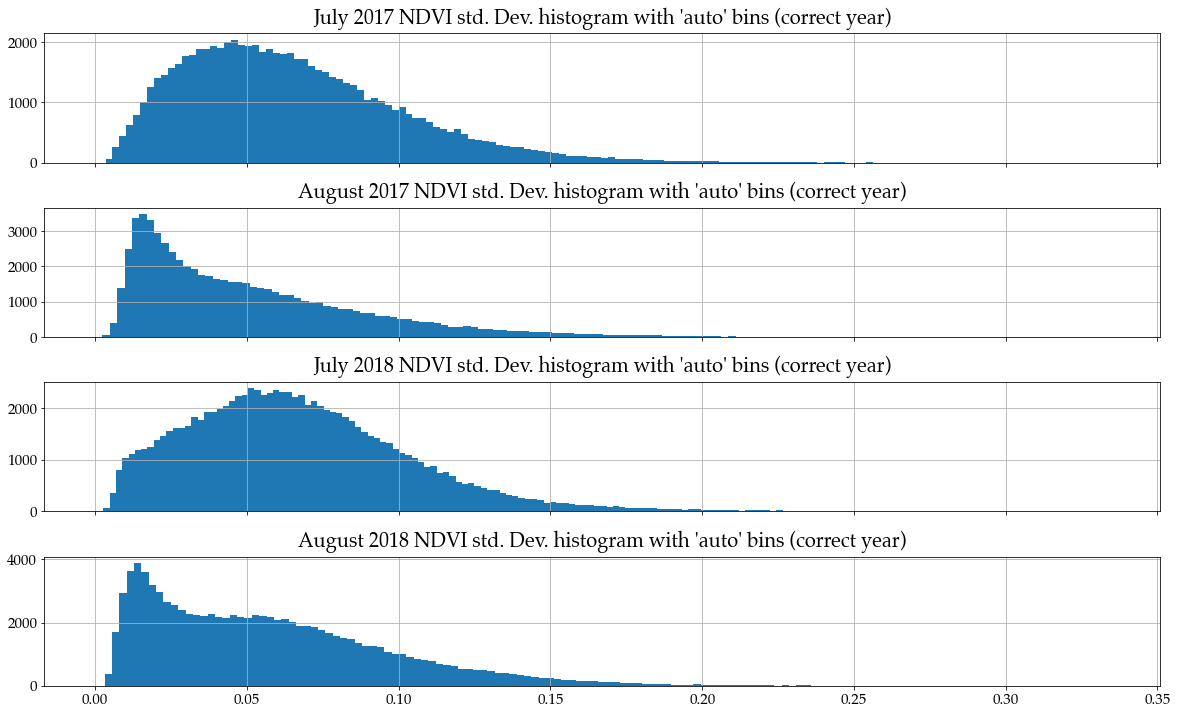

In [14]:
fig, axs = plt.subplots(4, 1, figsize=(20, 12),
                       sharex='col', sharey='row',
                       # sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.35, 'wspace': .05});

(ax1, ax2, ax3, ax4) = axs;
ax1.grid(True); ax2.grid(True)
ax3.grid(True); ax4.grid(True)

################
################  July 2017
################
_ = ax1.hist(July_2017['NDVI_max'], bins='auto');
ax1.set_title("July 2017 NDVI std. Dev. histogram with 'auto' bins (correct year)");

################
################  August 2017
################

_ = ax2.hist(Aug_2017['NDVI_max'], bins='auto');
ax2.set_title("August 2017 NDVI std. Dev. histogram with 'auto' bins (correct year)");


################
################  July 2018
################
_ = ax3.hist(July_2018['NDVI_max'], bins='auto');
ax3.set_title("July 2018 NDVI std. Dev. histogram with 'auto' bins (correct year)");

################
################  August 2018
################

_ = ax4.hist(Aug_2018['NDVI_max'], bins='auto');
ax4.set_title("August 2018 NDVI std. Dev. histogram with 'auto' bins (correct year)");


################
################  Save
################

plot_dir = data_dir + "raw_figures/"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

file_name = plot_dir + "varianceHistogram_CorrectYear.pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False);


In [15]:
np.sort(file_names_wrong).tolist()

['Eastern_WA_2017_07_variance_WrongYear.csv',
 'Eastern_WA_2017_08_variance_WrongYear.csv',
 'Eastern_WA_2018_07_variance_WrongYear.csv',
 'Eastern_WA_2018_08_variance_WrongYear.csv']

In [16]:
July_2017 = pd.read_csv(data_dir + "Eastern_WA_2017_07_variance_WrongYear.csv")
Aug_2017  = pd.read_csv(data_dir + "Eastern_WA_2017_08_variance_WrongYear.csv")
July_2018 = pd.read_csv(data_dir + "Eastern_WA_2018_07_variance_WrongYear.csv")
Aug_2018  = pd.read_csv(data_dir + "Eastern_WA_2018_08_variance_WrongYear.csv")

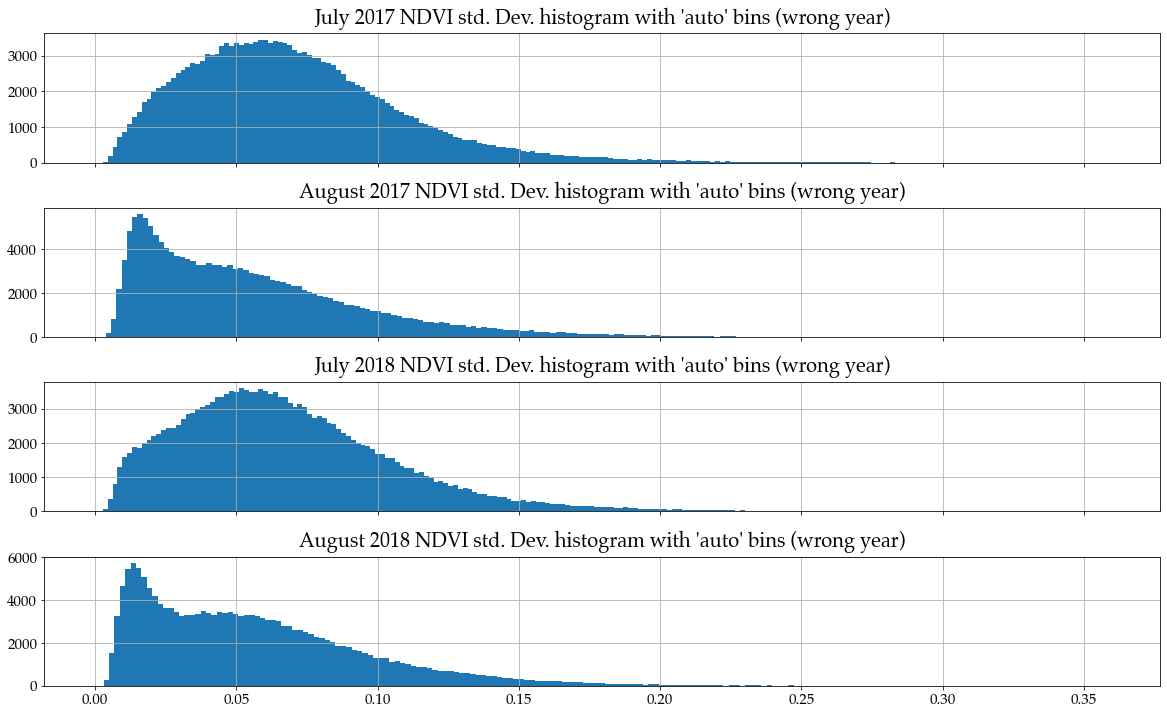

In [17]:
fig, axs = plt.subplots(4, 1, figsize=(20, 12),
                       sharex='col', sharey='row',
                       # sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.35, 'wspace': .05});

(ax1, ax2, ax3, ax4) = axs;
ax1.grid(True); ax2.grid(True)
ax3.grid(True); ax4.grid(True)

################
################  July 2017
################
_ = ax1.hist(July_2017['NDVI_max'], bins='auto');
ax1.set_title("July 2017 NDVI std. Dev. histogram with 'auto' bins (wrong year)");

################
################  August 2017
################

_ = ax2.hist(Aug_2017['NDVI_max'], bins='auto');
ax2.set_title("August 2017 NDVI std. Dev. histogram with 'auto' bins (wrong year)");


################
################  July 2018
################
_ = ax3.hist(July_2018['NDVI_max'], bins='auto');
ax3.set_title("July 2018 NDVI std. Dev. histogram with 'auto' bins (wrong year)");

################
################  August 2018
################

_ = ax4.hist(Aug_2018['NDVI_max'], bins='auto');
ax4.set_title("August 2018 NDVI std. Dev. histogram with 'auto' bins (wrong year)");


################
################  Save
################

plot_dir = data_dir + "raw_figures/"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

file_name = plot_dir + "varianceHistogram_WrongYear.pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False);


# Filter Irrigated Annuals

In [41]:
July_2017 = July_2017[July_2017.CropTyp.isin(irrigatedAnnuals.CropTyp)]
Aug_2017  = Aug_2017[Aug_2017.CropTyp.isin(irrigatedAnnuals.CropTyp)]
July_2018 = July_2018[July_2018.CropTyp.isin(irrigatedAnnuals.CropTyp)]
Aug_2018  = Aug_2018[Aug_2018.CropTyp.isin(irrigatedAnnuals.CropTyp)]

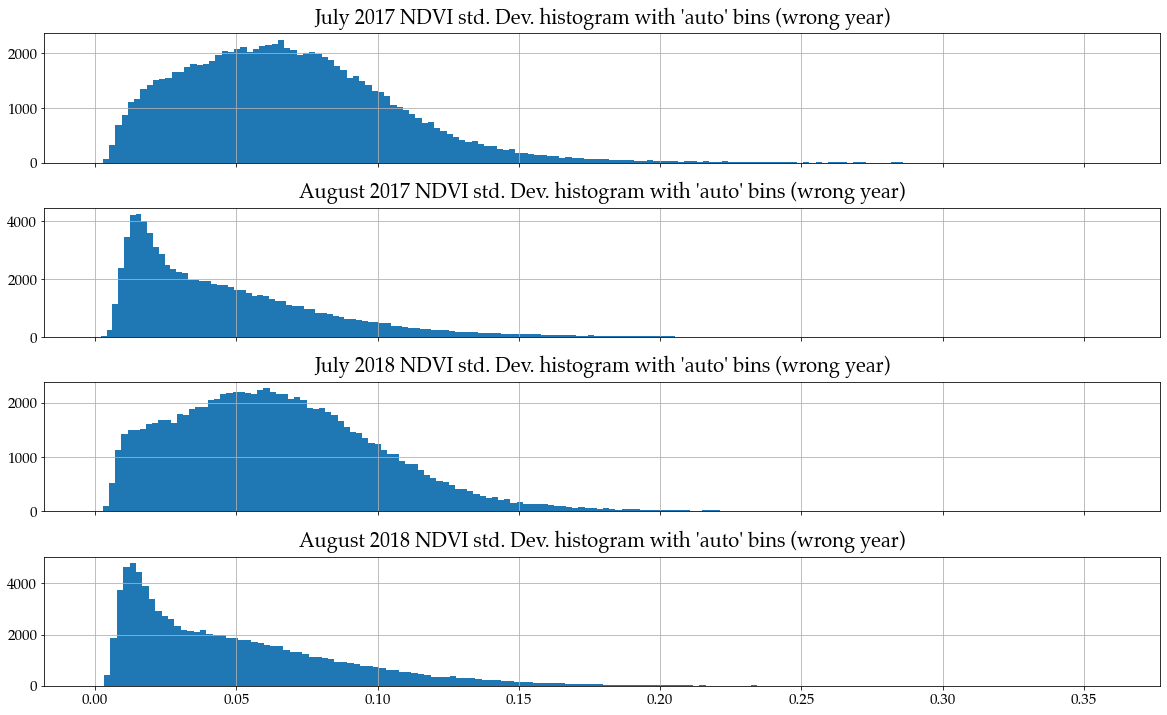

In [42]:
fig, axs = plt.subplots(4, 1, figsize=(20, 12),
                       sharex='col', sharey='row',
                       # sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.35, 'wspace': .05});

(ax1, ax2, ax3, ax4) = axs;
ax1.grid(True); ax2.grid(True)
ax3.grid(True); ax4.grid(True)

################
################  July 2017
################
_ = ax1.hist(July_2017['NDVI_max'], bins='auto');
ax1.set_title("July 2017 NDVI std. Dev. histogram with 'auto' bins (wrong year)");

################
################  August 2017
################

_ = ax2.hist(Aug_2017['NDVI_max'], bins='auto');
ax2.set_title("August 2017 NDVI std. Dev. histogram with 'auto' bins (wrong year)");


################
################  July 2018
################
_ = ax3.hist(July_2018['NDVI_max'], bins='auto');
ax3.set_title("July 2018 NDVI std. Dev. histogram with 'auto' bins (wrong year)");

################
################  August 2018
################

_ = ax4.hist(Aug_2018['NDVI_max'], bins='auto');
ax4.set_title("August 2018 NDVI std. Dev. histogram with 'auto' bins (wrong year)");


################
################  Save
################

plot_dir = data_dir + "raw_figures/"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

file_name = plot_dir + "varianceHistogram_WrongYear_IrrAnnuals.pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False);
